<a href="https://colab.research.google.com/github/Dicere/WB_Internship/blob/main/0_0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install nltk
!pip install pymorphy2
!pip string

In [ ]:
import nltk
import string
import pymorphy2
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("wordnet")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/content/drive/MyDrive/WB_стажировка/wb_school_task_2.csv.gzip',compression='gzip')
df = df.drop_duplicates()

###Ищем одинаковые текста отзывов с разными метками

In [4]:
grouped = df.groupby(by=['text']).label.nunique()
filtered_groups = grouped[grouped == 2]
print(filtered_groups)

text
Всё хорошо          2
Отличный товар      2
Понравилось         2
Спасибо большое     2
Хорошее качество    2
Хороший товар       2
Name: label, dtype: int64


In [8]:
df[df['text']=='Отличный товар']

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
308,8475818606116217053,12051995097094152758,16351792195234876872,Отличный товар,2,2,5.000000,3,0,4.333333,5,9,0
908,1067420748339676671,12751391871732575740,5973287941210242510,Отличный товар,32,31,4.968750,13,6,3.384615,60,78,0
931,2190073306598487136,10663392092561612328,16435932279958888502,Отличный товар,3,3,5.000000,4,4,5.000000,60,100,0
976,13940963354727118969,1708038596130570250,8223254633971568382,Отличный товар,23,22,4.826087,388,66,4.935567,36,40,0
991,65558817233465147,9764230189506184940,13603654093158122472,Отличный товар,7,3,5.000000,50,7,4.760000,38,56,0
1191,8776732628784065398,9321762976318024234,928100110523606381,Отличный товар,3,2,4.333333,12,1,4.666667,10,17,1
1415,3548725306204609416,7085517452224821381,11086519785440180638,Отличный товар,30,27,4.933333,53,9,4.584906,42,57,0
2720,10782360528429822322,18177394973300714794,15926100809697546575,Отличный товар,6,6,4.833333,4184,319,4.742591,9,10,1
2721,597598279020847181,15071223039320409256,545952374902728161,Отличный товар,4,4,2.500000,158,45,4.772152,18,19,0
2844,13791087788113145046,6385228084622115684,16971984002957170945,Отличный товар,1,1,5.000000,130,5,4.715385,1,2,0


#EDA

In [ ]:
df.head(5)

,id1,id2,id3,text,f1,f2,f3,f4,f5,f6,f7,f8,label
0,7596126584852021591,173777575861152844,18254136755182295358,"Хотела купить на замену старых,по итогу эти у...",1,1,1.0,11,13,4.272727,18,36,0
1,5327406586753254371,14366783259208998381,2324030737335224220,Запах по сравнению с обычным DOVE никакой. Оно...,10,6,2.7,46,4,4.434783,90,109,1
2,2636757786779776109,16985421652518589249,4904562693381133981,"Кабель подошёл, хорошо работает.",4,4,4.0,14,0,4.500000,4,6,0
3,15432976385014516263,2629180387521298831,13541353053200353836,"Восторг! Очень приятный аромат, держится долго...",6,6,5.0,374,30,4.772727,14,15,1
4,11933982800034911890,14531191561111600318,9121890650636487522,Визуально все хорошо. Не пробовали. Купили в п...,19,18,5.0,6,4,5.000000,26,33,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3122 entries, 0 to 3122
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id1     3122 non-null   uint64 
 1   id2     3122 non-null   uint64 
 2   id3     3122 non-null   uint64 
 3   text    3122 non-null   object 
 4   f1      3122 non-null   int64  
 5   f2      3122 non-null   int64  
 6   f3      3122 non-null   float64
 7   f4      3122 non-null   int64  
 8   f5      3122 non-null   int64  
 9   f6      3122 non-null   float64
 10  f7      3122 non-null   int64  
 11  f8      3122 non-null   int64  
 12  label   3122 non-null   int64  
dtypes: float64(2), int64(7), object(1), uint64(3)
memory usage: 341.5+ KB


In [ ]:
df.describe()

,id1,id2,id3,f1,f2,f3,f4,f5,f6,f7,f8,label
count,3.122000e+03,3.122000e+03,3.122000e+03,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000
mean,9.131319e+18,9.225744e+18,9.374463e+18,19.375400,16.193786,4.232476,808.859385,216.696989,4.453270,48.103459,94.272902,0.264254
std,5.355431e+18,5.336781e+18,5.328450e+18,35.700362,26.043476,1.180144,2509.711329,802.273584,0.619517,67.055156,329.545112,0.441006
min,1.761133e+16,5.008190e+15,2.716666e+16,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,4.531941e+18,4.498590e+18,4.713547e+18,2.000000,2.000000,4.076923,26.000000,6.000000,4.330943,8.000000,13.000000,0.000000
50%,9.019707e+18,9.282872e+18,9.120257e+18,8.000000,7.000000,4.764706,116.000000,26.000000,4.617812,30.000000,45.000000,0.000000
75%,1.378953e+19,1.376686e+19,1.395917e+19,23.000000,20.000000,5.000000,493.500000,110.500000,4.809509,65.000000,106.750000,1.000000
max,1.844348e+19,1.844196e+19,1.844430e+19,638.000000,550.000000,5.000000,35375.000000,15683.000000,5.000000,1058.000000,9243.000000,1.000000


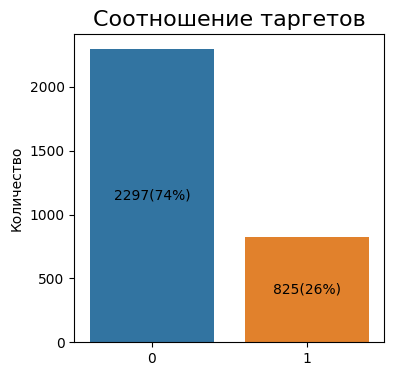

In [ ]:
figure, survive_bar = plt.subplots(figsize=(4, 4))
sns.barplot(x= df["label"].value_counts().index, y = df["label"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['0', '1'])
survive_bar.set_ylabel('Количество')
survive_bar.set_title('Соотношение таргетов', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(df.label))+')',
               horizontalalignment='center', verticalalignment='center')

In [ ]:
df["text"]

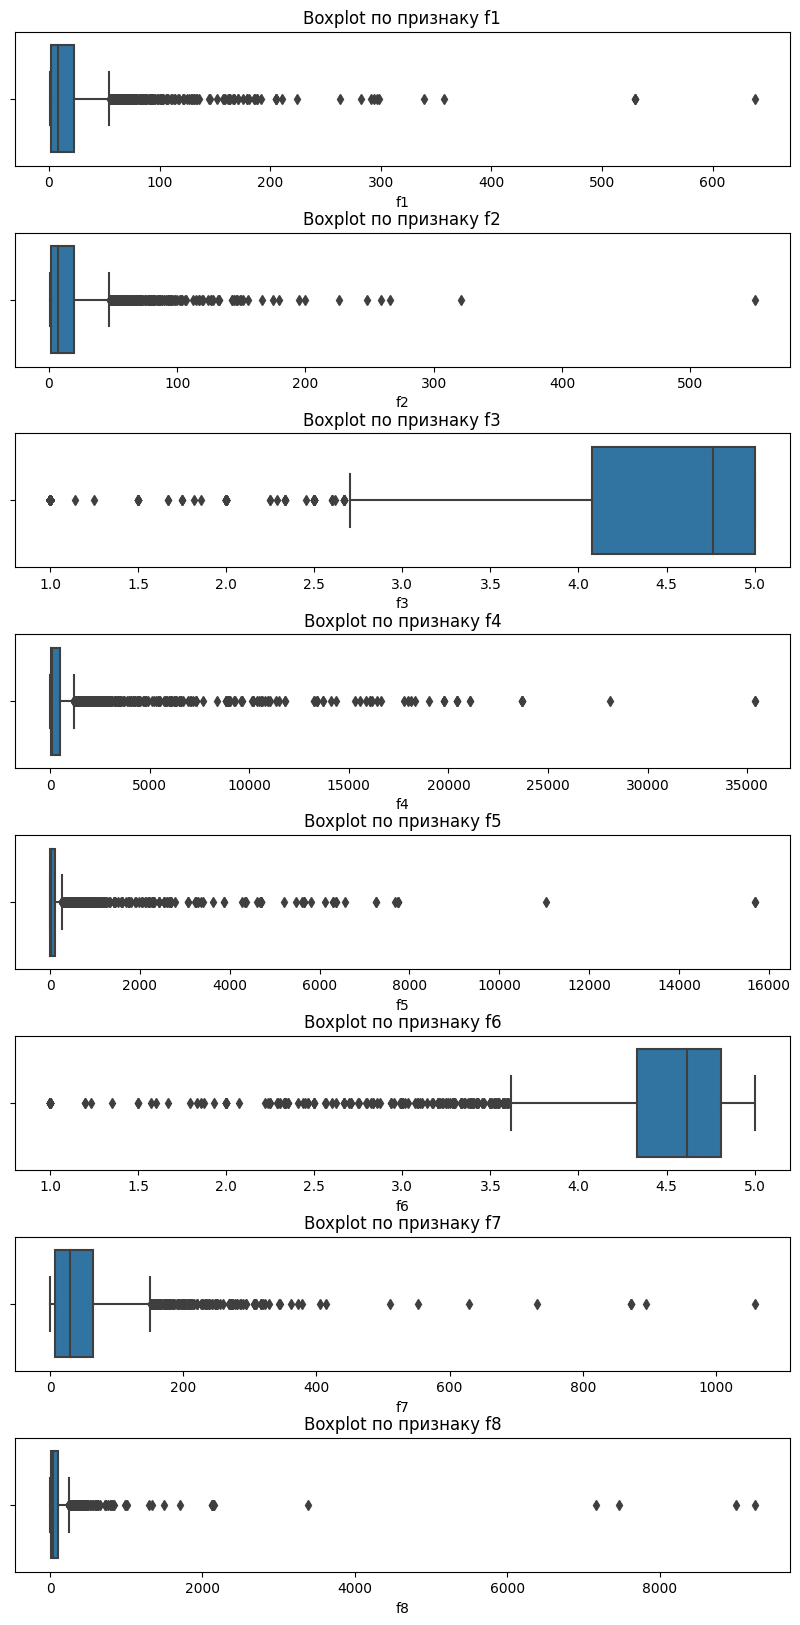

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 20),gridspec_kw={'hspace': 0.5, 'wspace':2})

for ax, col in zip(axes.flatten(), df[df.filter(regex='f').columns]):
    sns.boxplot(x=df[col], ax=ax)
    ax.set(title=f"Boxplot по признаку {col}")

plt.show()

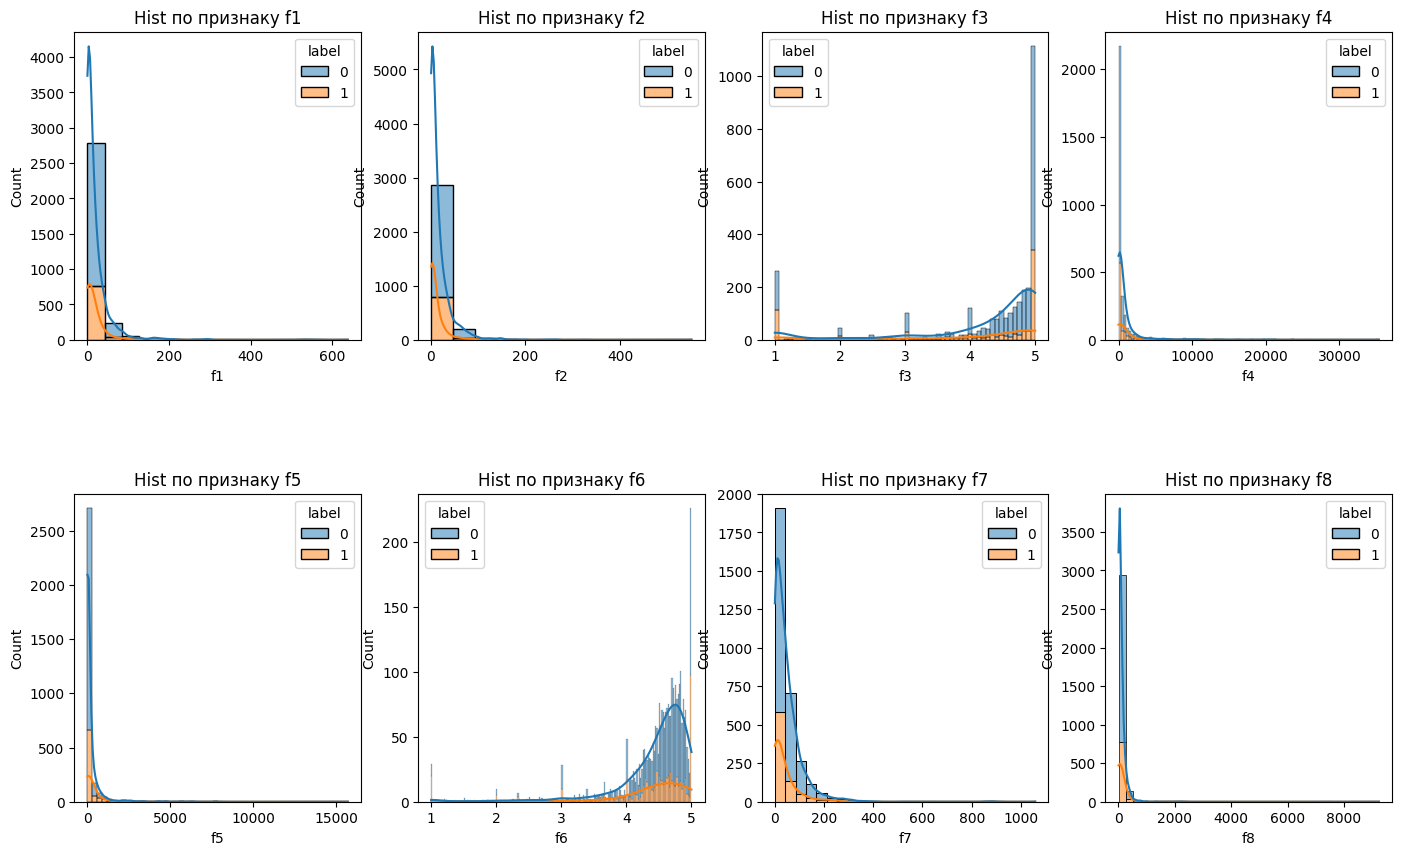

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17, 10),gridspec_kw={'hspace': 0.5, 'wspace':0.2})

for ax, col in zip(axes.flatten(), df[df.filter(regex='f').columns]):
    if df[col].nunique() < 100:
      bins1 = int(df[col].nunique()/2)
    else:
      bins1 = int(df[col].nunique()/10)
    sns.histplot(df,x=col,bins=bins1,hue="label",multiple="stack", ax=ax,kde=True)
    ax.set(title=f"Hist по признаку {col}")

plt.show()

<Figure size 2000x2000 with 0 Axes>

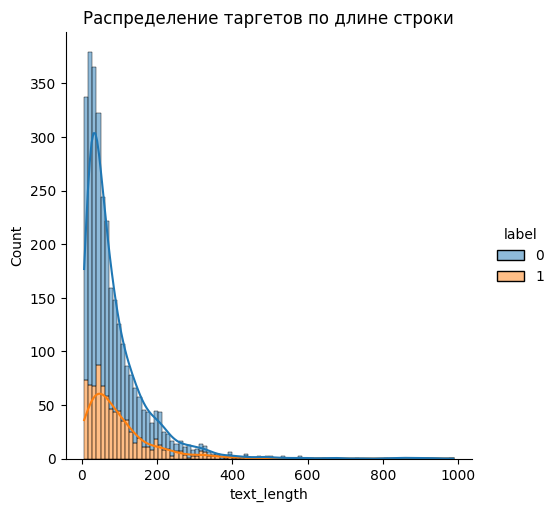

In [ ]:
df['text_length'] = df['text'].apply(len)
fig = plt.figure(figsize=(20, 20))
sns.displot(df, x='text_length', hue='label',multiple="stack", kde=True)
plt.title("Распределение таргетов по длине строки")
plt.show()

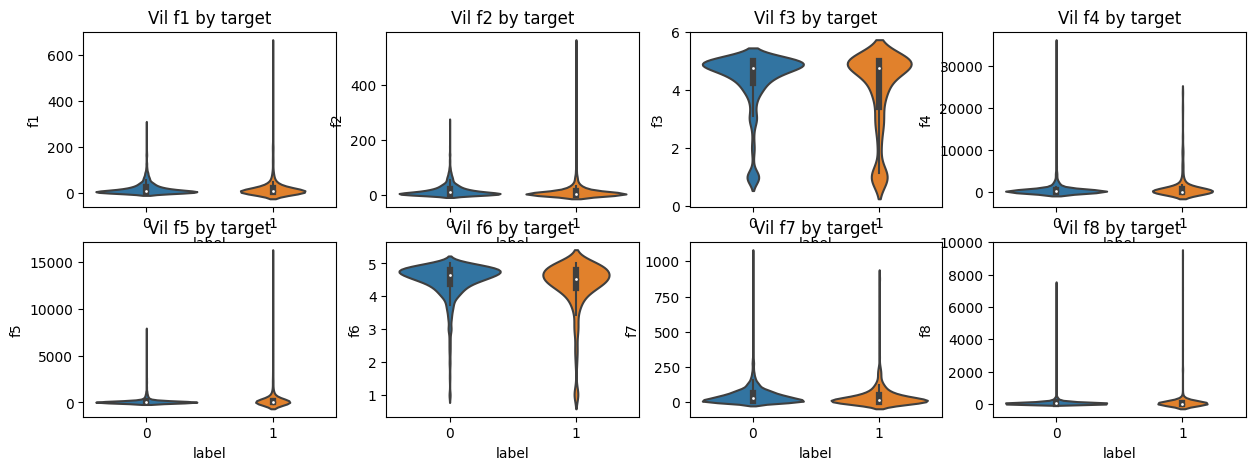

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))

for ax, col in zip(axes.flatten(), df[df.filter(regex='f').columns]):
    sns.violinplot(x='label', y=col, data=df, ax=ax)
    ax.set(title=f"Vil {col} by target")

plt.show()

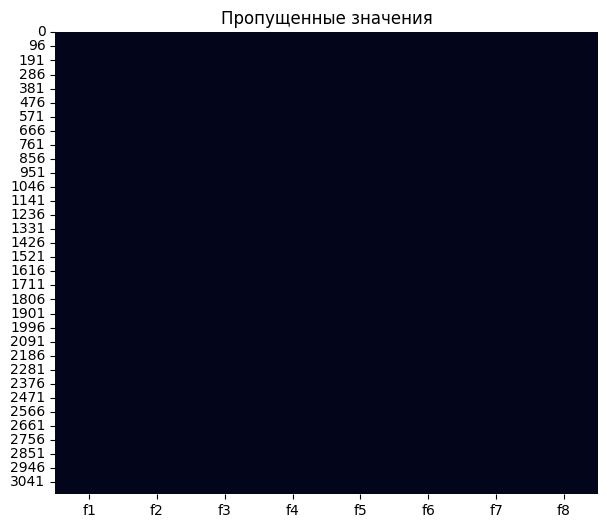

In [ ]:
fig = plt.figure(figsize=(7, 6))
sns.heatmap(df[df.filter(regex='f').columns].isna(),cbar=False,)
plt.title('Пропущенные значения')
plt.show()

In [ ]:
list_feature = df.filter(regex='f').columns
list_feature = list_feature.append(df.filter(regex='label').columns)

Text(0.5, 1.0, 'Матрица корреляций')

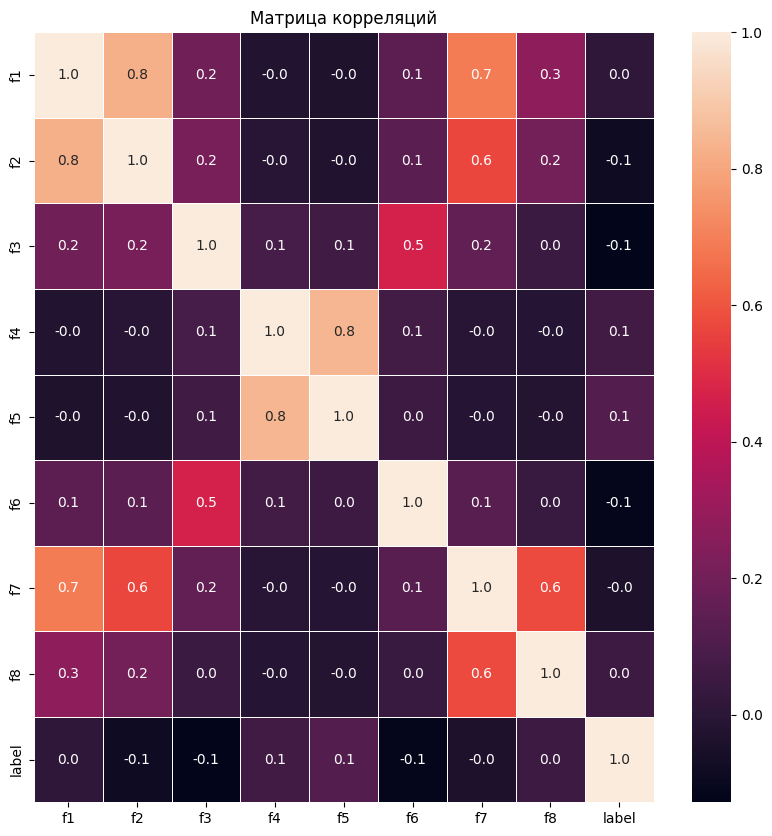

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[list_feature].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Матрица корреляций')

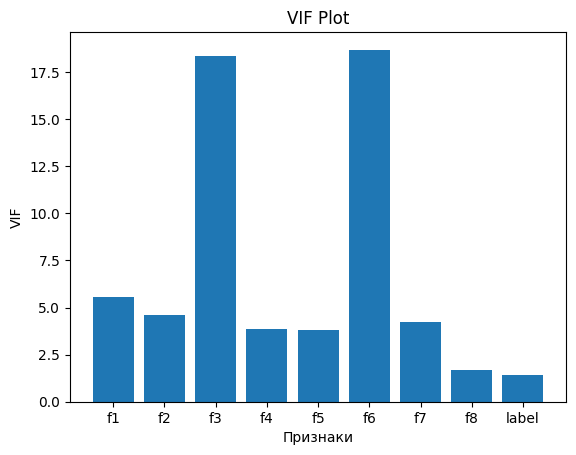

In [ ]:
y = df["label"]
X = df[list_feature]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Построение графика VIF
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(X.columns, vif)
ax.set_title("VIF Plot")
ax.set_xlabel("Признаки")
ax.set_ylabel("VIF")
plt.show()

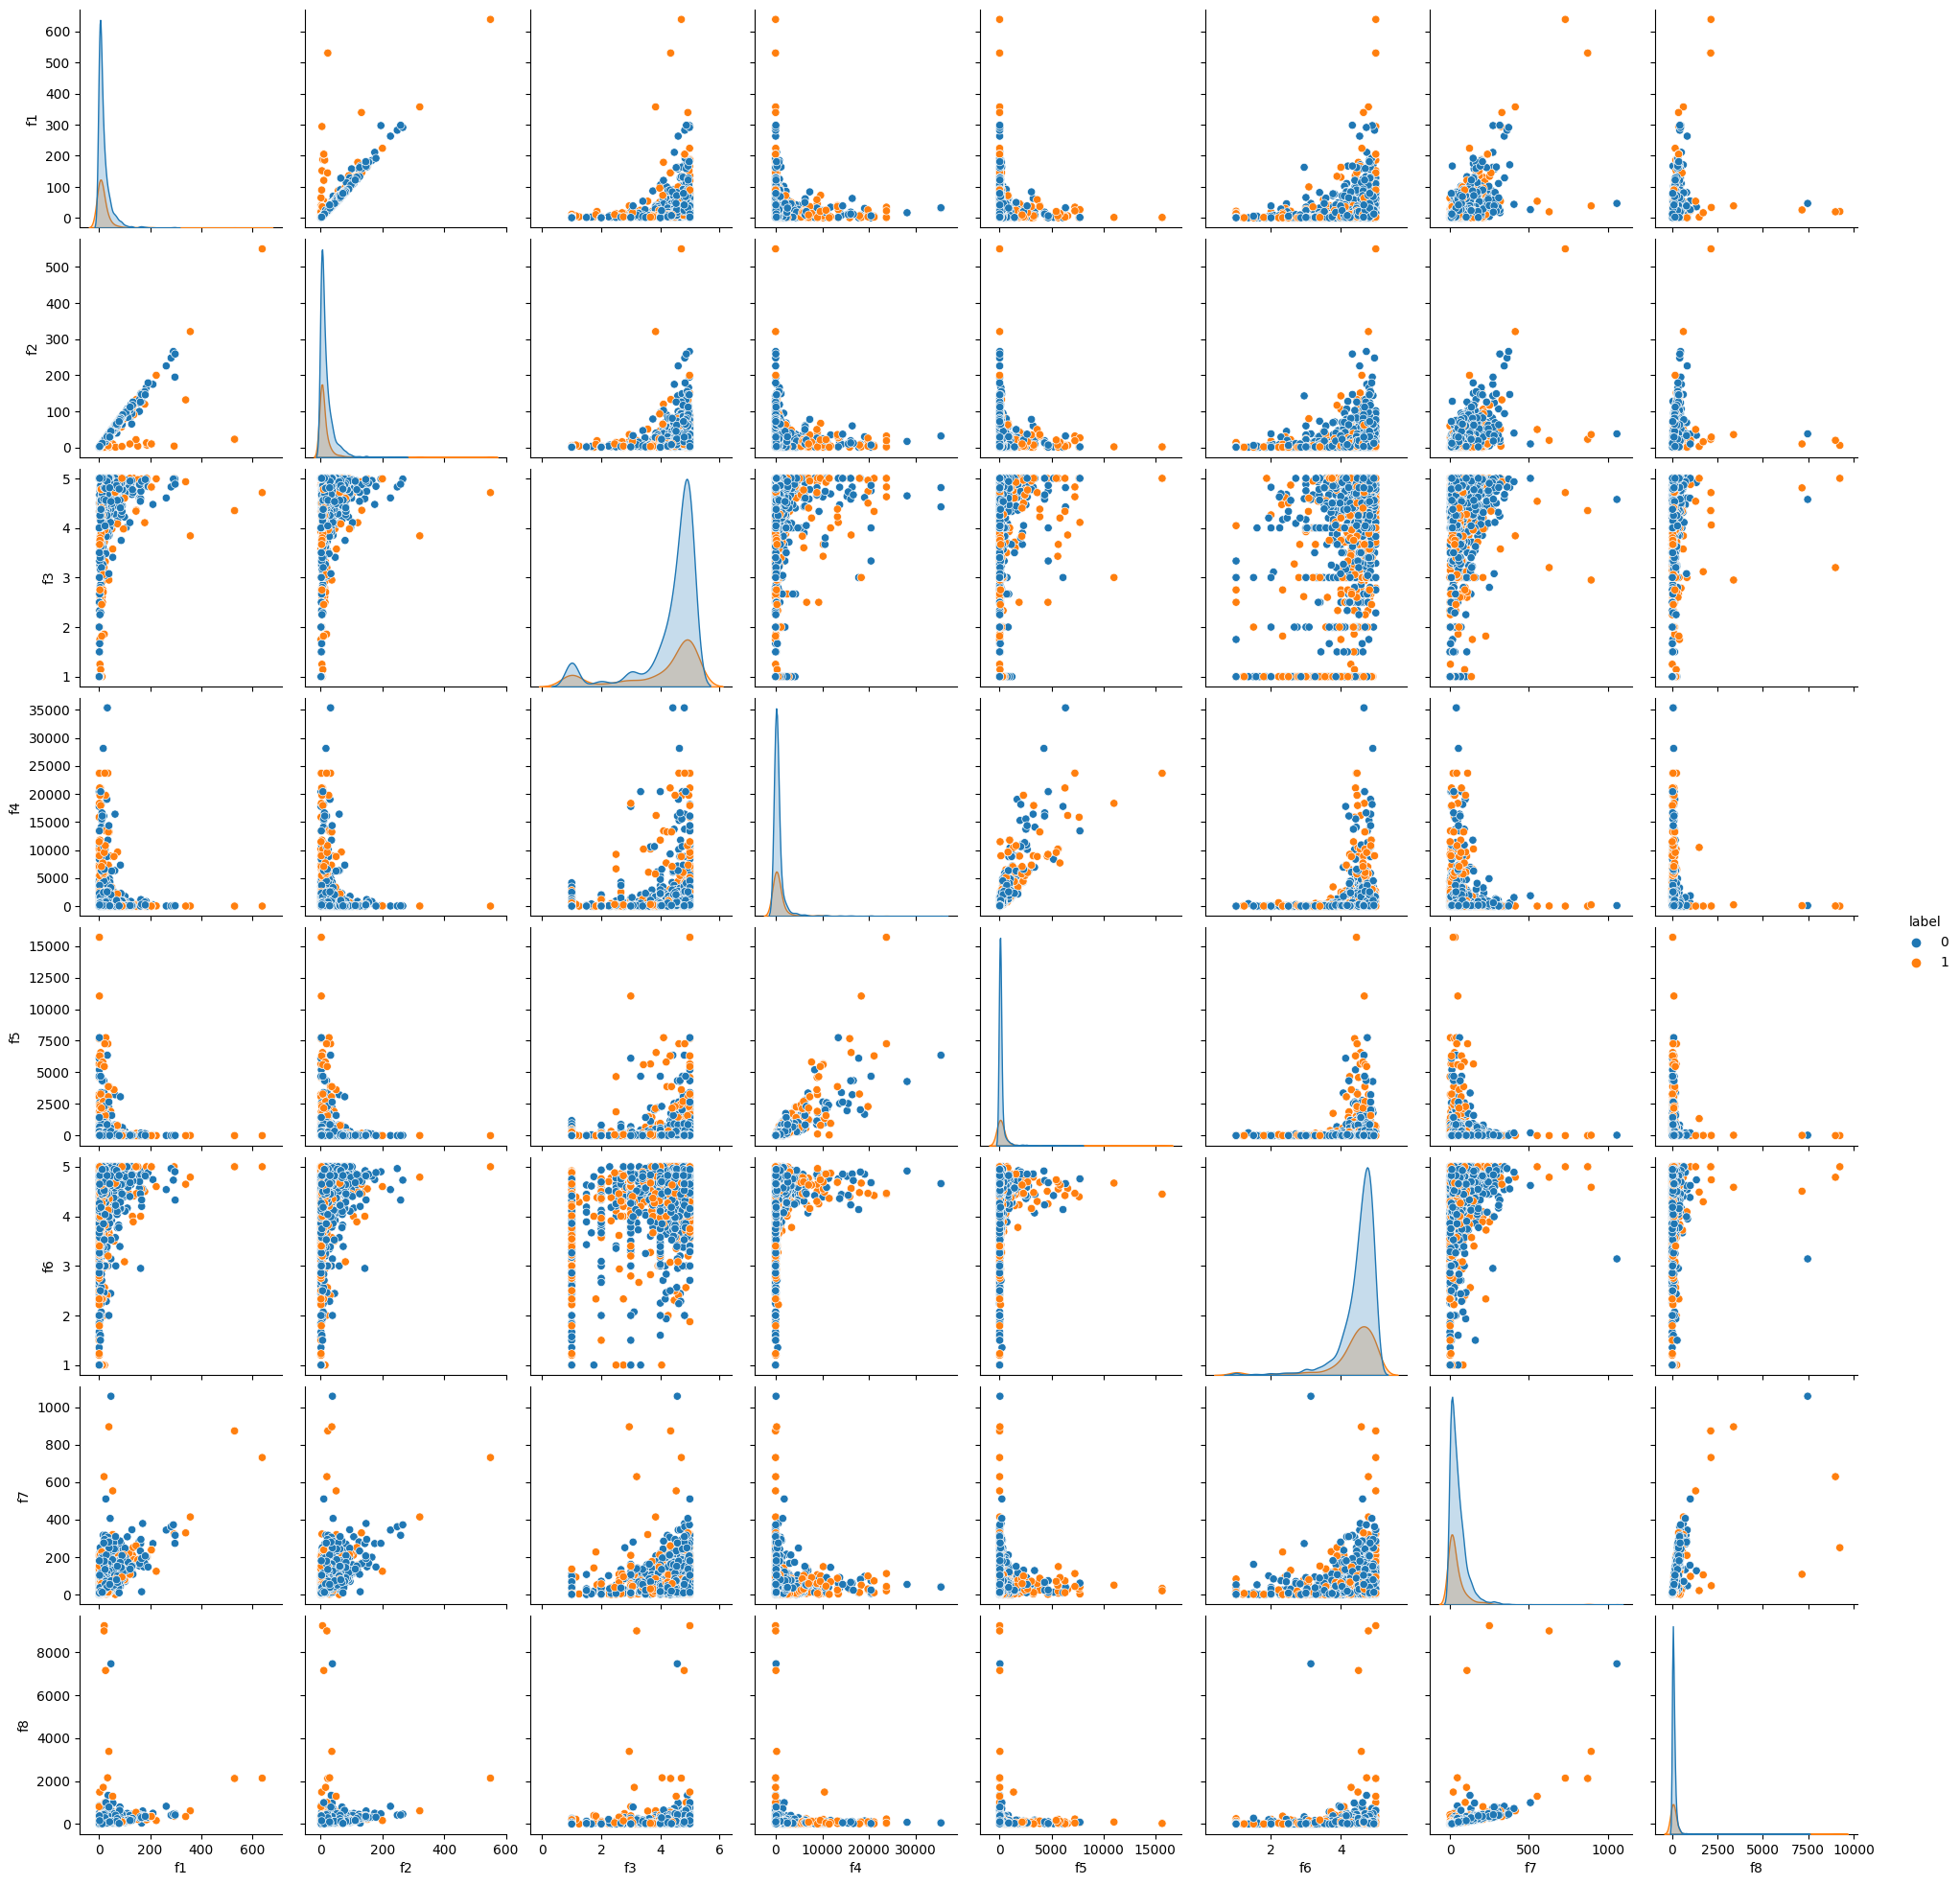

In [ ]:
sns.pairplot(data=df, vars=df[df.filter(regex='f').columns], hue='label')
plt.show()

###ОБЛАКА СЛОВ ПО ТАРГЕТАМ

In [ ]:
stop_words = set(stopwords.words('russian'))
morph = pymorphy2.MorphAnalyzer()
em= ['☝️', '☹', '☺️', '✌', '✨', '❤', '❤️', '❤️\u200d🔥', '🌸', '🌹', '🌺', '🌼', '🎁', '🎄', '🐈\u200d⬛', '🐤', '🐰', '👌', '👌🏻', '👌🏼', '👍', '👍🏻', '👍🏼', '👍🏽', '👍🏿', '👎🏼', '👏', '👾', '💄', '💋', '💐', '💓', '💕', '💖', '💗', '💘', '💙', '💛', '💜', '💞', '💣', '💥', '💩', '💪', '💫', '💯', '🔥', '😀', '😁', '😂', '😃', '😅', '😉', '😊', '😋', '😌', '😍', '😏', '😒', '😔', '😘', '😜', '😞', '😡', '😢', '😣', '😭', '😼', '😿', '🙂', '🙈', '🙌', '🙌🏻', '🙍', '🙏', '🛁', '🤍', '🤔', '🤗', '🤙', '🤣', '🤤', '🤦\u200d♀️', '🤩', '🤪', '🤬', '🤮', '🤷\u200d♀️', '🥰', '🥲', '🥳', '🥶', '🥺', '🪔', '🫒', '\U0001fae7', '\U0001faf6🏻']
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    text = ''.join([char for char in text if char not in em])
    tokens = text.split()
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['text_preproc'] = df['text'].apply(preprocess_text)


In [ ]:
def word_cloud(x):
  text = ' '.join(df[df['label']==x].text_preproc)
  words = [word for word in text.split()]

  # создание облака слов
  wc1 = WordCloud(width=600, height=600, background_color='white').generate(' '.join(words))

  # отображение облака слов
  import matplotlib.pyplot as plt
  plt.figure(figsize=(5,5), facecolor=None)
  plt.imshow(wc1)
  plt.title(f'Облако слов для метки: {x}')
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

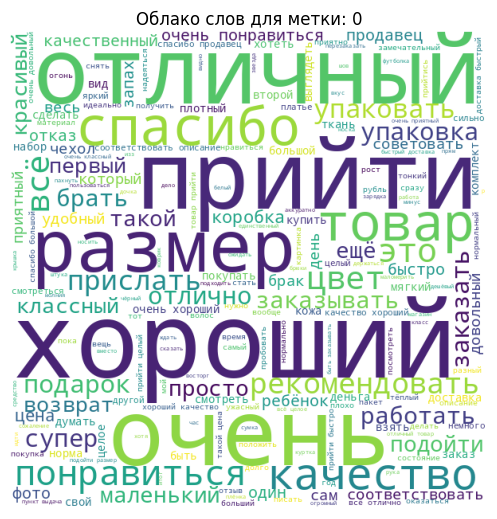

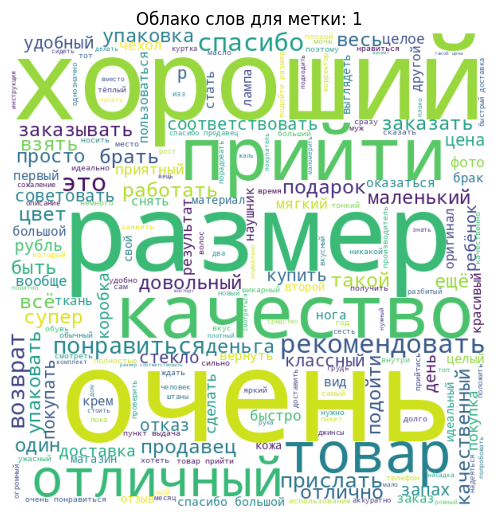

In [ ]:
for i in [0,1]:
  word_cloud(i)